### Transfer Learning

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [0]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [0]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10


Text(0.5, 1.0, 'Ground Truth : [3]')

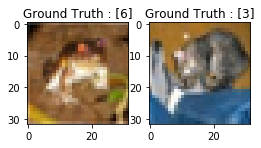

In [0]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


In [0]:

# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data  = test_images.reshape (test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [0]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
import keras
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(32,32,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(84, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 6)         24        
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 5, 5, 16)          64        
__________

In [0]:
batch_size = 32
epochs =10

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/SSDL/Day2")
#tensorboard --logdir=F:\logs\logs
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
mc = ModelCheckpoint('Models/cnn_mnist_ciphar10_Transfer.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='Models/logs', write_graph=True,write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('Models/cnn_mnist_ciphar10_Transfer.csv',append=True)
ea = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_split=(0.2))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 16s 391us/step - loss: 1.8354 - acc: 0.3420 - val_loss: 1.5874 - val_acc: 0.4273
Epoch 2/10
40000/40000 [==============================] - 13s 329us/step - loss: 1.5361 - acc: 0.4413 - val_loss: 1.4319 - val_acc: 0.4850
Epoch 3/10
40000/40000 [==============================] - 13s 331us/step - loss: 1.4539 - acc: 0.4748 - val_loss: 1.4865 - val_acc: 0.4766
Epoch 4/10
40000/40000 [==============================] - 13s 329us/step - loss: 1.3986 - acc: 0.4965 - val_loss: 1.2640 - val_acc: 0.5498
Epoch 5/10
40000/40000 [==============================] - 13s 325us/step - loss: 1.3594 - acc: 0.5132 - val_loss: 1.2156 - val_acc: 0.5649
Epoch 6/10
40000/40000 [==============================] - 13s 332us/step - loss: 1.3216 - acc: 0.5248 - val_loss: 1.2615 - val_acc: 0.5510
Epoch 7/10
40000/40000 [==============================] - 14s 345us/step - loss: 1.2911 - acc: 0.5396 - val_loss: 1.

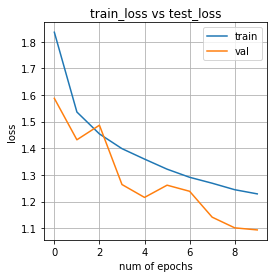

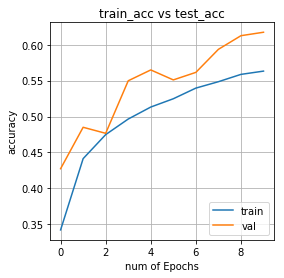

In [0]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)

In [0]:
model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 87us/step


[1.1018256858825684, 0.6059]

### Transfer Learning
* Importing VGG16 Model from Keras

Keras comes with many state of the art models with trained weights we can make use of these models for our custom datasets.
 
* Converting the model to Sequential and Removing the last fully connected layer

VGG 16 is trained on Imagenet dataset which consist of 1000 classes, Since our dataset consist of only 10 classes (Mnist), We remove last classification layer which is meant for classifying 1000 and replace it by the classification layer which is having only 10 classes.

* Freezing all the layers

Freexing the weights of the VGG16 model.

* Add the classification layer
We need add the classification layes (Number of classes depends on the problems)


In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Converting the VGG 16 Model to Sequential and Removing the Classification layer

In [0]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
model1 = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model1.add(layer)

In [0]:
type(model1)

keras.engine.sequential.Sequential

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

### Freezing the previous layers

In [0]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False

### Adding the classification layers

In [0]:
model1.add(Dense(10, activation='softmax'))

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=10, verbose=1, 
                   validation_split=(0.2))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 345us/step - loss: 1.2161 - acc: 0.5668 - val_loss: 1.3884 - val_acc: 0.5169
Epoch 2/10
40000/40000 [==============================] - 15s 366us/step - loss: 1.2020 - acc: 0.5745 - val_loss: 1.2709 - val_acc: 0.5554
Epoch 3/10
40000/40000 [==============================] - 13s 325us/step - loss: 1.1915 - acc: 0.5758 - val_loss: 1.1614 - val_acc: 0.5916
Epoch 4/10
40000/40000 [==============================] - 13s 324us/step - loss: 1.1792 - acc: 0.5815 - val_loss: 1.1300 - val_acc: 0.6035
Epoch 5/10
40000/40000 [==============================] - 13s 325us/step - loss: 1.1741 - acc: 0.5860 - val_loss: 1.1025 - val_acc: 0.6104
Epoch 6/10
40000/40000 [==============================] - 13s 322us/step - loss: 1.1604 - acc: 0.5883 - val_loss: 1.0982 - val_acc: 0.6098
Epoch 7/10
40000/40000 [==============================] - 13s 322us/step - loss: 1.1529 - acc: 0.5907 - val_loss: 1.

In [0]:
model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 1s 84us/step


[1.0129951705932618, 0.6411]